<h1>Sales Analysis<h1>

<h2>Import Libraries<h2>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import 

<h2>Import and Merge Data<h2>

In [2]:
files = [file for file in os.listdir('./Data')]

sales_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Data/'+file)
    sales_data = pd.concat([sales_data, df])

<h3>Delete NaN rows<h3>

In [3]:
sales_data.dropna( axis=0,how = 'all' , inplace = True)

sales_data.to_csv('all_data.csv', index = False)
sales_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


<h3>Convert Order Date to date<h3>

In [4]:

sales_data = sales_data.drop(sales_data[sales_data["Order Date"] == "Order Date"].index).reset_index(drop= True)

In [5]:
sales_data["Quantity Ordered"] = sales_data["Quantity Ordered"].astype(float)
sales_data["Price Each"] = sales_data["Price Each"].astype(float)
sales_data["Order ID"] = sales_data["Order ID"].astype(int)

In [6]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format="%m/%d/%y %H:%M")
sales_data.dtypes

Order ID                     int32
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

<h2>Add Sales Collum<h2>

In [7]:
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

In [ ]:
<h3>Group by Month<h3>

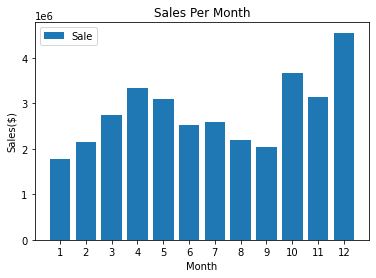

In [8]:
pd.options.display.float_format = '${:,.2f}'.format
plt.title('Sales Per Month')
plt.bar(range(1,13),sales_data.groupby(pd.DatetimeIndex(sales_data["Order Date"]).month).sum()["Sales"],label = 'Sale')
plt.xticks(range(1,13))
plt.ylabel('Sales($)')
plt.xlabel('Month')
plt.legend()
plt.show()

<h1>Find the sales by city<h1>

In [9]:
sales_data['city'] = sales_data['Purchase Address'].str.split(',').str[1]
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city
0,176558,USB-C Charging Cable,$2.00,$11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",$23.90,Dallas
1,176559,Bose SoundSport Headphones,$1.00,$99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",$99.99,Boston
2,176560,Google Phone,$1.00,$600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",$600.00,Los Angeles
3,176560,Wired Headphones,$1.00,$11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",$11.99,Los Angeles
4,176561,Wired Headphones,$1.00,$11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",$11.99,Los Angeles
...,...,...,...,...,...,...,...,...
182730,259353,AAA Batteries (4-pack),$3.00,$2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",$8.97,Los Angeles
182731,259354,iPhone,$1.00,$700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",$700.00,San Francisco
182732,259355,iPhone,$1.00,$700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",$700.00,San Francisco
182733,259356,34in Ultrawide Monitor,$1.00,$379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",$379.99,San Francisco


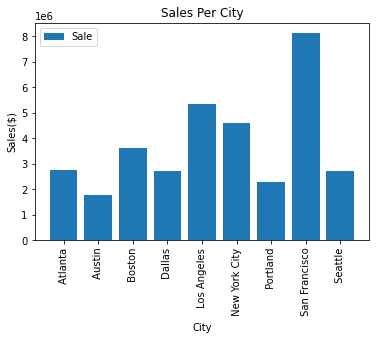

In [12]:
pd.options.display.float_format = '${:,.2f}'.format

#to get same cities for labels
cities = [city for city, df in sales_data.groupby('city')]


plt.title('Sales Per City')
plt.bar(cities,sales_data.groupby("city").sum()["Sales"],label = 'Sale')
plt.xticks(cities, rotation = 'vertical')
plt.ylabel('Sales($)')
plt.xlabel('City')
plt.legend()
plt.show()

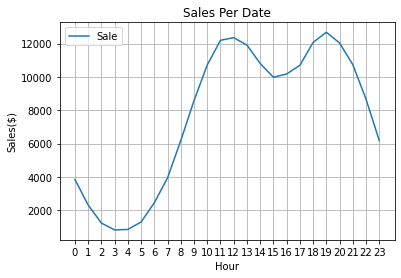

In [33]:
sales_by_date = sales_data.groupby("Order Date").sum()["Sales"]

plt.title('Sales Per Date')
plt.plot(sales_data.groupby(sales_data["Order Date"].dt.hour).count()["Sales"],label = 'Sale')
plt.xticks(range(0,24))
plt.ylabel('Sales($)')
plt.xlabel('Hour')
plt.legend()
plt.grid()
plt.show()